In [1]:
import sys  
sys.path.insert(1, '../../')

In [2]:
import torch

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, RandomSampler

from classifiers.nn.numbers_recognizing.linear_model import NumbersRecognizer
from determining.random_settings import determine_random

In [ ]:
determine_random()
# Автоматическое определение, где запускать код: на Nvidia GPU или на CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Скачивание и загрузка набора данных MNIST
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(
    "../../datasets/numbers_recognizing/data",
    train=True,
    download=False,
    transform=transform)
test_data = datasets.MNIST(
    "../../datasets/numbers_recognizing/data",
    train=False,
    download=False,
    transform=transform)

# Преобразование полученного набора данных
# RandomSampler перемешивает выборку, гарантируя, что каждый пример будет
# взят ровно 1 раз
train_sampler = RandomSampler(train_data)
test_sampler = RandomSampler(test_data)
trainset = DataLoader(
    dataset=train_data,
    batch_size=64,
    sampler=train_sampler)
testset = DataLoader(
    dataset=test_data,
    batch_size=64,
    sampler=test_sampler)

model = NumbersRecognizer().to(device)
model.start_train(trainset)
model.do_test(testset)

for i, (stat) in enumerate(model.train_stat):
    print(i)
    print(f'Precision: {stat.precision}')
    print(f'Recall: {stat.recall}')
    print(f'F1 Score: {stat.f1}')
    print(f'Loss: {stat.loss}')

print()
print(f'Precision: {model.test_stat.precision}')
print(f'Recall: {model.test_stat.recall}')
print(f'F1 Score: {model.test_stat.f1}')

Epoch 1/3, Loss: 0.21511578559875488
Epoch 2/3, Loss: 0.011425387114286423


1.0
0

1.0
2

1.0
2


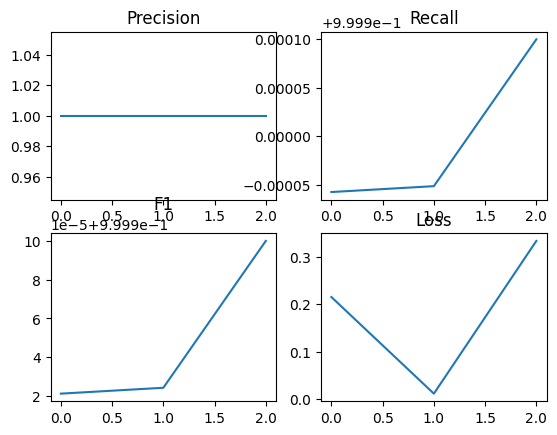

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

max_precision = 0
max_precision_i = 0
max_f1 = 0
max_f1_i = 0
max_recall = 0
max_recall_i = 0

for i, (stat) in enumerate(model.train_stat):
    # print(i)
    # print(f'Precision: {stat.precision:.2f}')
    # print(f'Recall: {stat.recall:.2f}')
    # print(f'F1 Score: {stat.f1:.2f}')
    # print(f'Loss: {stat.loss:.2f}')
    if (max_precision < stat.precision):
        max_precision = stat.precision
        max_precision_i = i

    if (max_f1 < stat.f1):
        max_f1 = stat.f1
        max_f1_i = i

    if (max_recall < stat.recall):
        max_recall = stat.recall
        max_recall_i = i
print(max_precision)
print(max_precision_i)
print()
print(max_recall)
print(max_recall_i)
print()
print(max_f1)
print(max_f1_i)

X = np.arange(0, len(model.train_stat), 1)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = [i.precision for i in model.train_stat]
Y2 = [i.recall for i in model.train_stat]
Y3 = [i.f1 for i in model.train_stat]
Y4 = [i.loss for i in model.train_stat]

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Precision")

# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Recall")

# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("F1")

# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Loss")

# Combine all the operations and display
plt.show()